# 객체 지향 퍼셉트론 API

In [ ]:
import numpy as np

class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ---------------
    eta : float (학습률, 0.0과 1.0 사이)
    n_iter : int (훈련 데이터셋 반복 횟수)
    random_state : int (가중치 무작위 초기화를 위한 난수 생성기 시드)

    속성
    ---------------
    w_ : 1d-array (학습된 가중치)
    errors_ : list (epoch마다 누적된 분류 오류)
    """

    # 초기값
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    # 예측
    def predict(self, x):
        x = np.insert(x, 0, 1.0)
        return np.where(np.dot(x, self.w_) >= 0.0, 1, -1)

    # 오차
    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ---------------
        X : array, shape=[n_samples, n_features]
        y : array, shape=[n_samples]

        반환값
        self : object
        """

        # parameter initialization
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)

        # iteration
        self.errors_ = []
        self.erros_ = []
        for _ in range(self.epochs):
            errors = 0
            for xi, label in zip(X, y):
                update = self.eta * (label - self.predict(xi))
                self.w_ += update * np.insert(xi, 0, 1.0)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

True : 1 Predict : 1    -> Correct 1-1=0<br>
True : 1 Predict : -1   -> Incorrect 1-(-1) = 2<br>
True : -1 Predict : 1   -> Incorrect -1-(1) = -2<br>
True : -1 Predict : -1  -> Correct -1-(-1) = 0

실제가 1인데 -1이 나왔다 다음업데이트는 더해야 한다.
실제가 -1인데 1이 나왔다. 다음업데이트는 빼야 한다.


# IRIS 퍼셉트론 학습하기

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

columns = np.append(iris['feature_names'],np.array(['target']))

df = pd.DataFrame(np.c_[iris['data'],iris['target']], columns=columns)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


* setosa와 versicolor인 경우만 존재한다고 하자.
* 위의 퍼셉트론 학습에 따라 setosa이면 1 versicolor이면 -1이라고 하자.
* sepal length와 petal length에 대해 훈련하고자 한다.

In [ ]:
df = df[(df['target'] != 2)]
df.target = np.where(df['target'] == 0, 1, -1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,-1
96,5.7,2.9,4.2,1.3,-1
97,6.2,2.9,4.3,1.3,-1
98,5.1,2.5,3.0,1.1,-1


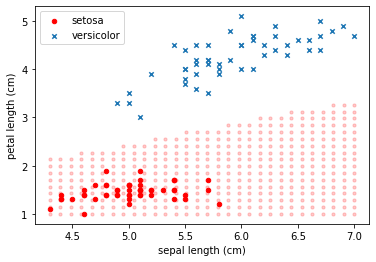

In [ ]:
import matplotlib.pyplot as plt

ax = df[df['target']==1].plot(x='sepal length (cm)', y='petal length (cm)',
                              kind='scatter', color='red', label='setosa')
df[df['target']==-1].plot(x='sepal length (cm)', y='petal length (cm)', color='blue',
                          kind='scatter', marker='x', ax=ax, label='versicolor')
plt.show()

In [ ]:
X = df.loc[:,['sepal length (cm)', 'petal length (cm)']].to_numpy()
y = df.target

In [ ]:
ppn = Perceptron(eta=0.01, n_iter=50, random_state=100)
ppn.fit(X, y)

array([ 0.04250235,  0.1074268 , -0.23446964])

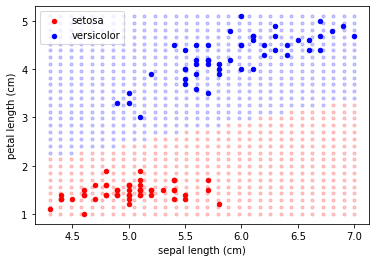

In [ ]:
x1min = df.iloc[:,0].min()
x1max = df.iloc[:,0].max()

x2min = df.iloc[:,2].min()
x2max = df.iloc[:,2].max()

x1 = np.linspace(x1min, x1max, 30)
x2 = np.linspace(x2min, x2max, 30)

# plt.scatter(np.meshgrid(x1, x2)[0], np.meshgrid(x1, x2)[1], s=10)

xygrid = np.meshgrid(x1, x2)
x1grid = xygrid[0].flatten()
x2grid = xygrid[1].flatten()
decision = np.where(ppn.w_[0] + x1grid*ppn.w_[1] + x2grid*ppn.w_[2] >= 0.0, 1, -1)


ax = df[df['target']==1].plot(x='sepal length (cm)', y='petal length (cm)',
                              kind='scatter', color='red', label='setosa')
df[df['target']==-1].plot(x='sepal length (cm)', y='petal length (cm)',
                          kind='scatter', color='blue', ax=ax, label='versicolor')
plt.scatter(x1grid[decision==1], x2grid[decision==1], s=10, alpha=0.2, color='red')
plt.scatter(x1grid[decision==-1], x2grid[decision==-1], s=10, alpha=0.2, color='blue')
plt.legend(loc='upper left')
ppn.w_

In [ ]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# AND Gate
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [-1, -1, -1, 1]
X = np.array(x_data)
y = np.array(y_data)

p = Perceptron()
p.fit(X, y)
p.w_
p.predict(X)

array([-1, -1, -1,  1])

In [ ]:
data = np.array([[2, 0, -1],
                 [4, 4, -1],
                 [6, 2, 1],
                 [8, 3, 1]])
X = data[:,0:2]
y = data[:,2]

p2 = Perceptron(eta = 0.05, n_iter=1000, random_state=100)
p2.fit(X, y)
print(p2.w_)
print(p2.predict(X))

print("Accuracy rate=", np.sum(y == p2.predict(X)) / X.shape[0])

[-0.41749765  0.2034268  -0.38846964]
[-1 -1  1  1]
Accuracy rate= 1.0


array([-1, -1,  1,  1])

epoch=0 / w=[ 0.06008559 -0.07203379 -0.01343396] / Accuracy rate=0.6
epoch=5 / w=[ 0.01808559 -0.03218697  0.02695841] / Accuracy rate=0.7
epoch=10 / w=[ 8.55949264e-05 -1.00096426e-02  3.25484543e-02] / Accuracy rate=0.85
epoch=15 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=20 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=25 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=30 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=35 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=40 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=45 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0
epoch=50 / w=[-0.01191441  0.00532434  0.03124193] / Accuracy rate=1.0


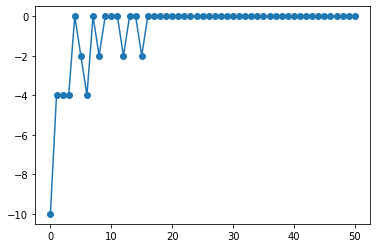

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make data
np.random.seed(1)
x1 = np.random.rand(20)
x2 = np.random.rand(20)
w = np.array([-0.7, 1, 1])

X = np.c_[np.ones_like(x1), x1, x2]
y = np.where(np.dot(X, w) >= 0.0, 1, -1)

# Settings
lr = 0.003
epochs = 50
w_lst = []
err_lst = []

# parameter initialization
w = np.random.normal(loc=0, scale=0.1, size=X.shape[1])

# Update parameter
prt_size = 10 if epochs >= 100 else 5

for i in range(epochs + 1):
    err = 0
    for xi, yi in zip(X, y):
        ypred = np.where(np.dot(xi, w) >= 0, 1, -1)
        w += lr * (yi - ypred) * xi
        err += yi - ypred
    err_lst.append(err)
    w_lst.append(w.copy())

    ypred = np.where(np.dot(X, w) >= 0, 1, -1)
    ar = (y == ypred).sum() / len(y)

    if i % prt_size == 0:
        print('epoch={} / w={} / Accuracy rate={}'.format(i, w, ar))

plt.plot(err_lst, 'o-')
plt.show()



In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

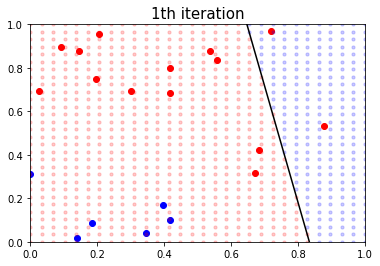

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

xmesh = np.meshgrid(np.linspace(0, 1, 30), np.linspace(0, 1, 30))
x1grid = xmesh[0].flatten()
x2grid = xmesh[1].flatten()
Xgrid = np.c_[np.ones_like(x1grid), x1grid, x2grid]

fig = plt.figure()

def update(i):
    w = w_lst[i]

    ygrid = np.where(np.dot(Xgrid, w) >= 0, 1, -1)

    plt.clf()
    plt.scatter(x1[y==1], x2[y==1], color='red')
    plt.scatter(x1[y==-1], x2[y==-1], color='blue')
    plt.scatter(x1grid[ygrid==1], x2grid[ygrid==1], color='red', alpha=0.2, s=10)
    plt.scatter(x1grid[ygrid==-1], x2grid[ygrid==-1], color='blue', alpha=0.2, s=10)
    plt.plot(np.linspace(0, 1, 30), -w[0]/w[2] -w[1]/w[2]*np.linspace(0, 1, 30), color='black')
    plt.title(f'{i+1}th iteration', size=15)
    plt.xlim(0, 1)
    plt.ylim(0, 1)


graph_ani = FuncAnimation(fig=fig, func=update, frames=range(epochs))
graph_ani.save('graph_ani.gif', writer='imagemagick', fps=10, dpi=100)

from IPython.display import HTML
HTML(graph_ani.to_html5_video())

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train )